# Model Building

Wir haben unsere Daten auf den 20 realen Spalten trainiert. Danach führen wir den Code von oben erneut aus und lassen den trainingsprozess aus, um NULL testdaten zu erzielen. Diese NULL testdaten (19 Spalten random - nur Pow_600 original) übergeben wir dem Model. Dieses predicted Pow_600 ebenfalls gut. Möglciherweise muss das Model aber wissen an welchen Stelle die Pow_x ist.

## Imports

In [3]:
# Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import MeanSquaredError
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import tensorflow.keras as K

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

Set Graphic Resulution

In [4]:
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300

Read In the different Datasets

In [5]:
df = pd.read_excel('DiscreteMotion_Data_Horizontalsetup.xlsx')

In [19]:
df.Pow_100 = 0
df.Pow_200 = 0
df.Pow_300= 0
df.Pow_400= 0
df.Pow_500= 0
#
df.Pow_700= 0
df.Pow_800= 0
df.Pow_900= 0
df.Pow_1000= 0
df.Pow_1100= 0
df.Pow_1200= 0
df.Pow_1300= 0
df.Pow_1400= 0
df.Pow_1500= 0
df.Pow_1600= 0
df.Pow_1700= 0
df.Pow_1800= 0
df.Pow_1900= 0
df.Pow_2000= 0



In [20]:
df

,Pow_100,Pow_200,Pow_300,Pow_400,Pow_500,Pow_600,Pow_700,Pow_800,Pow_900,Pow_1000,Pow_1100,Pow_1200,Pow_1300,Pow_1400,Pow_1500,Pow_1600,Pow_1700,Pow_1800,Pow_1900,Pow_2000
time_index,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000,0,0,0,0,0,0.516,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1970-01-01 00:00:00.001,0,0,0,0,0,0.516,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1970-01-01 00:00:00.002,0,0,0,0,0,5.676,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1970-01-01 00:00:00.003,0,0,0,0,0,5.676,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1970-01-01 00:00:00.004,0,0,0,0,0,5.676,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:44.995,0,0,0,0,0,5.566,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1970-01-01 00:00:44.996,0,0,0,0,0,5.566,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1970-01-01 00:00:44.997,0,0,0,0,0,5.566,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Set the dataframes' time index to a 45000 entity long datetime64 range separated by 10 ms

In [21]:
time_index = np.arange('1970-01-01T00:00:00.000', '1970-01-01T00:07:30.000',dtype='datetime64[10ms]')
df['time_index'] = time_index
df.set_index('time_index', inplace=True)

In [22]:
df.describe()

,Pow_100,Pow_200,Pow_300,Pow_400,Pow_500,Pow_600,Pow_700,Pow_800,Pow_900,Pow_1000,Pow_1100,Pow_1200,Pow_1300,Pow_1400,Pow_1500,Pow_1600,Pow_1700,Pow_1800,Pow_1900,Pow_2000
count,45000.0,45000.0,45000.0,45000.0,45000.0,45000.000000,45000.0,45000.0,45000.0,45000.0,45000.0,45000.0,45000.0,45000.0,45000.0,45000.0,45000.0,45000.0,45000.0,45000.0
mean,0.0,0.0,0.0,0.0,0.0,2.493221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,2.058099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.265500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,3.738000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,4.242000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,7.608000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Defining Functions

Split the data accoring into Train Data (80%) , Validation Data (10%) and Test Data (10%) 

In [23]:
def split_data(df):
    train = df[:36000]
    val = df[36000:40500]
    test = df[40500:]
    return train, val, test

Normalize the Data in a range between 0 and 1

In [24]:
def scale_data(train, val, test):
    scaler = MinMaxScaler(feature_range=(0,1))
    train_scaled = scaler.fit_transform(train)
    val_scaled = scaler.transform(val)
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, val_scaled, test_scaled

function to create 3D arrays with certain window sizes for X_input and Y_output **(Window-Size Approach)**




In [25]:
def to_supervised(sequence, window_size, forecast_horizon):
    X, y = [], []
    for i in range(len(sequence) - window_size - forecast_horizon + 1):
        X.append(sequence[i:i+window_size])
        y.append(sequence[i+window_size:i+window_size+forecast_horizon])
    return np.array(X), np.array(y)

## Data Preparation

Split the dataframe into Train-, Val- and Test Data

In [26]:
train, val, test = split_data(df)

Scale the Data betweet 0 and 1 using the MinMaxScaler

In [27]:
scaler, train, val, test = scale_data(train, val, test)

Prepare the input for supervised learning (using a **window-size of 40** and a **forecast-horizon of 20**)

In [28]:
X_train, y_train = to_supervised(train, window_size=40, forecast_horizon=20)
X_val, y_val = to_supervised(val, window_size=40, forecast_horizon=20)
X_test, y_test = to_supervised(test, window_size=40, forecast_horizon=20)

Check the shape of the Training Data

In [29]:
X_train.shape

(35941, 40, 20)

## Build LSTM Model

### Model Summary

In [16]:
model = Sequential()
model.add(LSTM(128, input_shape=(40, 20), activation='relu'))
model.add(RepeatVector(20))
model.add(LSTM(64, return_sequences=True))
model.add(TimeDistributed(Dense(32)))
model.add(Dense(20))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               76288     
                                                                 
 repeat_vector (RepeatVector  (None, 20, 128)          0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 20, 64)            49408     
                                                                 
 time_distributed (TimeDistr  (None, 20, 32)           2080      
 ibuted)                                                         
                                                                 
 dense_1 (Dense)             (None, 20, 20)            660       
                                                                 
Total params: 128,436
Trainable params: 128,436
Non-trai

### Compile the LSTM Model

In [17]:
model.compile(loss='mae', optimizer=Adam(learning_rate=0.001), metrics=['mse'])

Create Callback and Fit the Training Dataset

In [18]:
stop_early_lstm = K.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), callbacks=[stop_early_lstm])

Epoch 1/5
1124/1124 [==============================] - 83s 70ms/step - loss: 0.1714 - mse: 0.0636 - val_loss: 0.1441 - val_mse: 0.0428
Epoch 2/5
1124/1124 [==============================] - 79s 70ms/step - loss: 0.1277 - mse: 0.0367 - val_loss: 0.1230 - val_mse: 0.0331
Epoch 3/5
1124/1124 [==============================] - 79s 70ms/step - loss: 0.1128 - mse: 0.0305 - val_loss: 0.1143 - val_mse: 0.0296
Epoch 4/5
1124/1124 [==============================] - 79s 71ms/step - loss: 0.1050 - mse: 0.0276 - val_loss: 0.1048 - val_mse: 0.0266
Epoch 5/5
1124/1124 [==============================] - 79s 71ms/step - loss: 0.0994 - mse: 0.0257 - val_loss: 0.1034 - val_mse: 0.0271


### Model History

Summarize and plot the history of the loss and val_loss

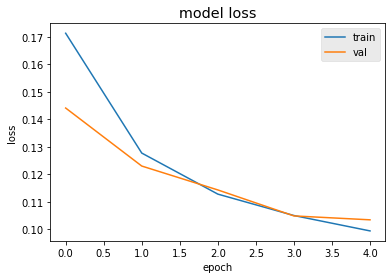

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.style.use("ggplot")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

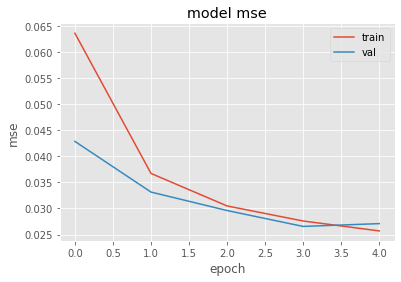

In [31]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.style.use("ggplot")
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

Evaluate Model // Show the MAE and MSE metrics

In [32]:
model.evaluate(X_test, y_test)

139/139 [==============================] - 3s 24ms/step - loss: 0.4404 - mse: 0.2550


[0.4403892159461975, 0.2549808621406555]

### Predicting LSTM

Predict LSTM Model

In [33]:
yhat = model.predict(X_test)

139/139 [==============================] - 4s 24ms/step


In [34]:
test_shape = y_test.shape

Saving the shape of y_test

In [35]:
yhat

array([[[ 0.03427581,  0.0625488 ,  0.13779657, ...,  0.20071903,
          0.2154178 ,  0.17207116],
        [ 0.00506635,  0.06294672,  0.15403025, ...,  0.37176496,
          0.23679721,  0.22084375],
        [ 0.00113841,  0.07716759,  0.14329891, ...,  0.5026668 ,
          0.28975576,  0.27846885],
        ...,
        [ 0.41064668,  0.32999635,  0.47129953, ...,  0.5619456 ,
          0.47997215,  0.55485696],
        [ 0.416906  ,  0.34067416,  0.47880852, ...,  0.49935323,
          0.43624842,  0.5513687 ],
        [ 0.42303002,  0.3495838 ,  0.48388043, ...,  0.448939  ,
          0.3894742 ,  0.5452397 ]],

       [[ 0.03514827,  0.06205705,  0.13707155, ...,  0.20021462,
          0.21743041,  0.17294209],
        [ 0.00552952,  0.06269336,  0.15319195, ...,  0.37129298,
          0.23934233,  0.22195147],
        [ 0.00134905,  0.07697202,  0.14246222, ...,  0.50223327,
          0.29231626,  0.27951962],
        ...,
        [ 0.41069445,  0.3291918 ,  0.46944118, ...,  

Backing up the data

In [36]:
yhat2 = yhat
y_test2 = y_test

New Unseen Predictions

Function for rescaling the Data fo fit into the DL-Models

In [37]:
def inverse_scale_data(yhat, y_test):
    yhat_reshaped = yhat.reshape(-1,yhat.shape[-1])
    y_test_reshaped = y_test.reshape(-1,y_test.shape[-1])

    yhat_inverse = scaler.inverse_transform(yhat_reshaped)
    y_test_inverse = scaler.inverse_transform(y_test_reshaped)
    return yhat_inverse, y_test_inverse

Rescale

In [38]:
def inverse_scale_data_alt(yhat, y_test):
    yhat_reshaped = yhat.reshape(-1,yhat.shape[-1])
    y_test_reshaped = y_test.reshape(-1,y_test.shape[-1])
    
    yhat_inverse = scaler.inverse_transform(yhat_reshaped)
    y_test_inverse = scaler.inverse_transform(y_test_reshaped)

    return yhat_inverse, y_test_inverse

In [39]:
re_yhat, re_y_test = inverse_scale_data_alt(yhat2, y_test2)

### Calculating the additional Predictions of 600ms (AddOn – Recursive Method)

In [40]:
y_test_3 = y_test
y_test_4 = y_test
y_test_5 = y_test

In [41]:
# reshape from 2D back to 3D (2D was necessary for the inverse scaling)
re_yhat2 = re_yhat.reshape(test_shape)
re_y_test2 = re_y_test.reshape(test_shape)

# Model Evaluation

## Defining Functions

In [42]:
from math import sqrt
# evaluate forecasts against expected values
def evaluate_forecasts(actual, predicted):
    scores_pow = results = np.zeros((20, 20))
    scores = []
 # calculate an RMSE score for each prediction period
    for i in range(actual.shape[1]):
      for t in range(actual.shape[2]):
       # calculate mse
       scores_pow[i, t] = sqrt(mean_squared_error(actual[:, t, i], predicted[:, t, i]))
 # calculate overall RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col, 1] - predicted[row, col, 1])**2
            score = sqrt(s / (actual.shape[0] * actual.shape[1]))
    return np.array(score), np.array(scores_pow)

In [43]:
def summarize_scores(name, score, scores):
    s_scores = ', '.join(['%.3f'% s for s in scores])
    print('%s: [%.3f] %s' % (name, score, s_scores))

## Evaluate Model

In [44]:
overall_RMSE, all_RMSEs = evaluate_forecasts(re_y_test2, re_yhat2)

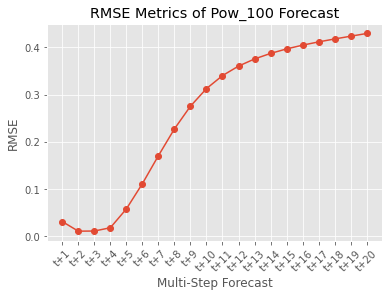

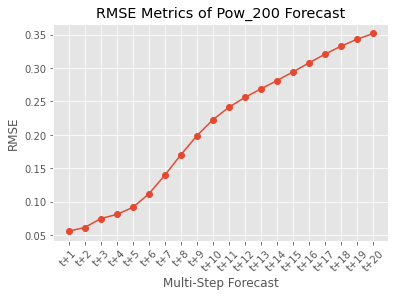

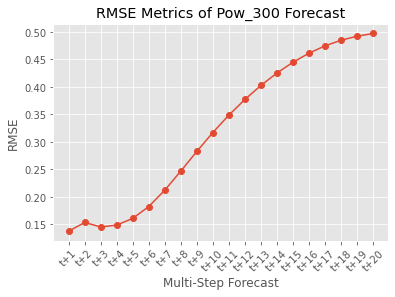

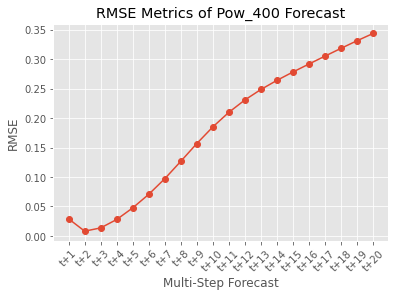

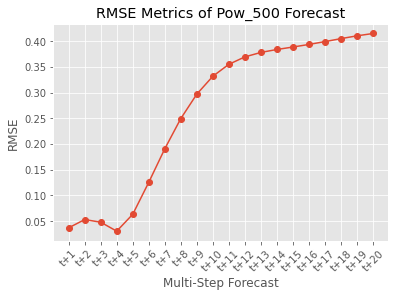

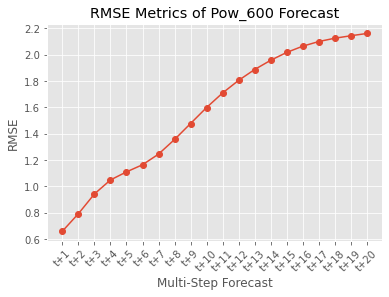

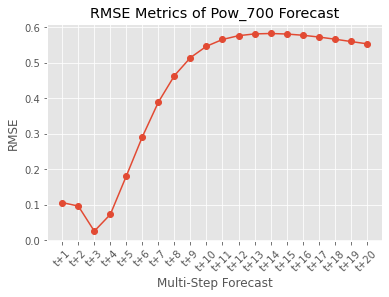

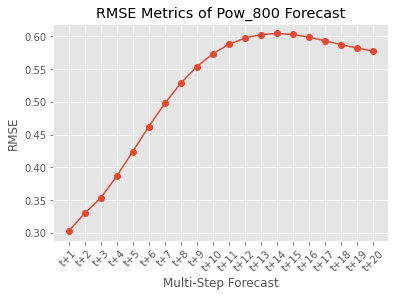

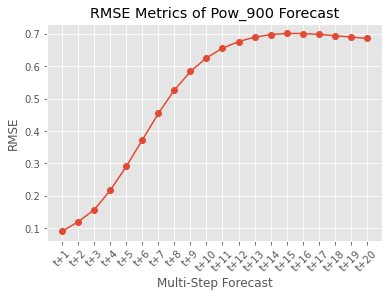

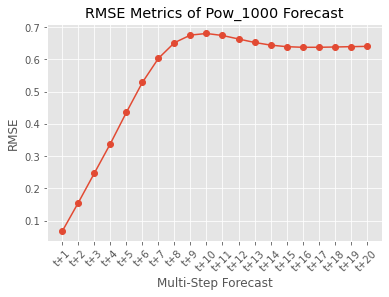

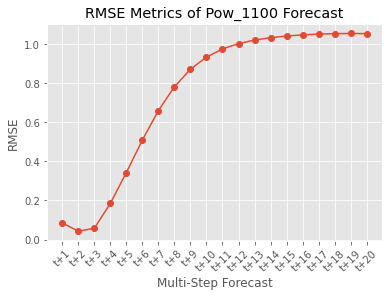

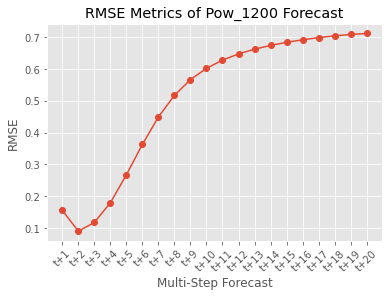

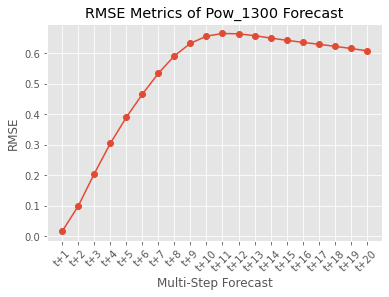

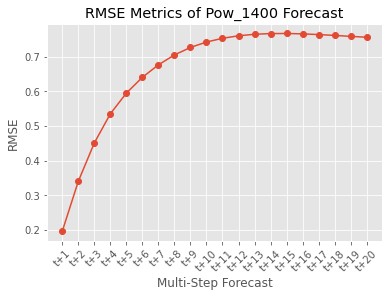

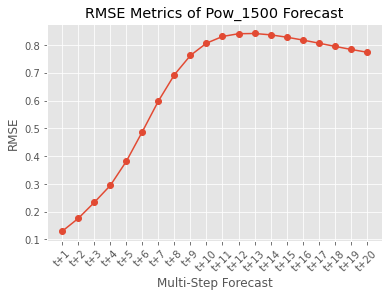

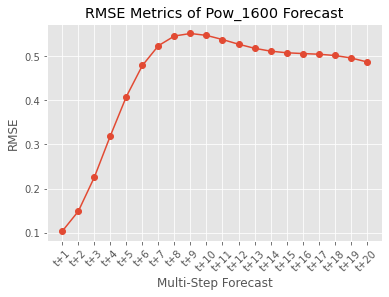

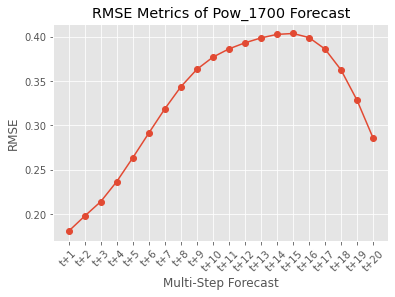

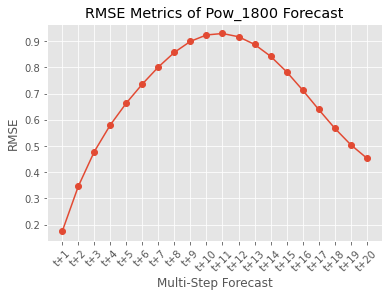

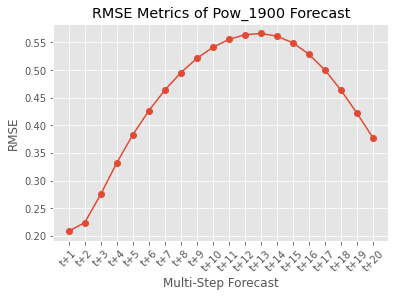

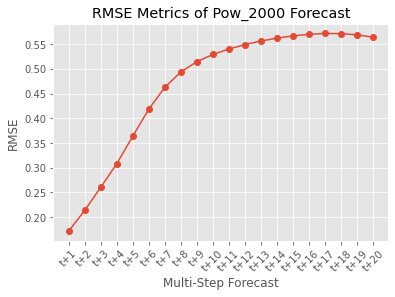

In [45]:
forecast = []
for i in range(1,21):
    title = f't+{i}'
    forecast.append(title)
for i in range(20):
  plt.style.use("ggplot")
  plt.plot(forecast, all_RMSEs[i], marker='o', label='lstm')
  plt.xticks(rotation=45)
  plt.title('RMSE Metrics of Pow_' +str(100*(i+1))+ ' Forecast')
  plt.xlabel('Multi-Step Forecast')
  plt.ylabel('RMSE')
  plt.show()

Build the dataframe for the additional 600ms predictions (Recursive Method)

**Function for printing out the 20 RMP`s Predictions vs. its Acutals**

In [46]:
from sklearn.metrics import r2_score
def print_act_and_pred_tables(yhat,ytest,forecast_horizon, start_graph,end_graph):
  pow_preds = []
  pow_actuals = []
  for i in range(20):
    pow_preds.append(yhat[:, forecast_horizon-1, i]) # 1 refers to the forecast horizon --> t+1; shape of yhat: [(length), (n_outputs), (n_features)]
    pow_actuals.append(ytest[:, 0, i])

  data = {}
  for i in range(20):
    pow_pred_label = f"Pow{100*(i+1)} Predictions"
    pow_act_label = f"Pow{100*(i+1)} Actuals"
    data[pow_pred_label] = pow_preds[i]
    data[pow_act_label] = pow_actuals[i]
  df_new = pd.DataFrame(data=data)
  #Plot
  for i in range(20):
    fig = plt.figure(figsize=(15, 7))
    plt.style.use("ggplot")
    # Select the actuals and predictions columns
    actuals = df_new[f"Pow{100*(i+1)} Actuals"][start_graph:end_graph]
    predictions = df_new[f"Pow{100*(i+1)} Predictions"][start_graph:end_graph]
    # shift the t+20 prediction 20 (relating to the wished forecast horizon) to the right
    p_temp = predictions.to_frame()
    p_temp['time_index_shift'] = predictions.index+forecast_horizon-1
    p_temp.set_index('time_index_shift', inplace=True)
    # Plot the data
    plt.plot(p_temp, alpha=0.6)
    plt.plot(actuals, alpha=0.7)
    # Set the plot title and axis labels
    plt.title(f'Pow{100*(i+1)} Predictions and Actuals (Discrete Motion)')
    plt.xlabel('Time in ms')
    plt.ylabel('Power Consumption in Watts')
    # Draw horizontal Lines for better comparison
    plt.axvline(x=4439, linestyle=":", color="grey")
    plt.axvline(x=4477, linestyle="-", linewidth = 75, color="red", alpha=0.05)
    # Set the legend
    plt.legend(['Predictions', 'Actuals'])
    # Show the plot
    plt.show()

## Print Actuals and Predictions

### **With Forecast Horizon of t+20** [Range: last 1500 Timestamps]

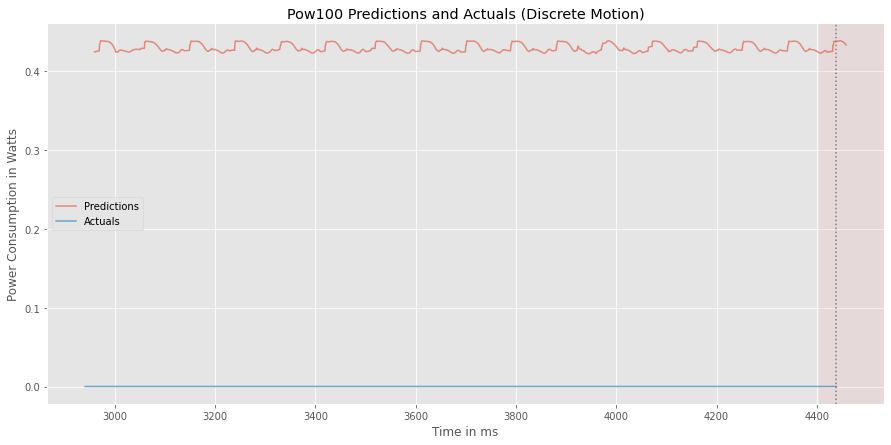

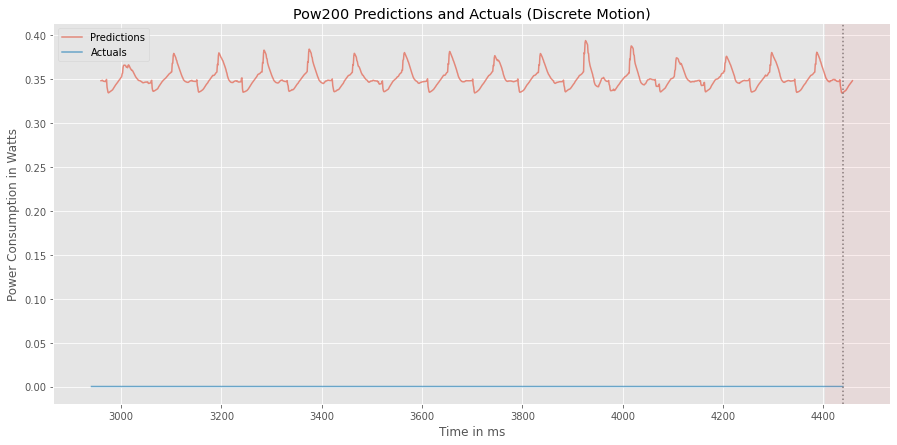

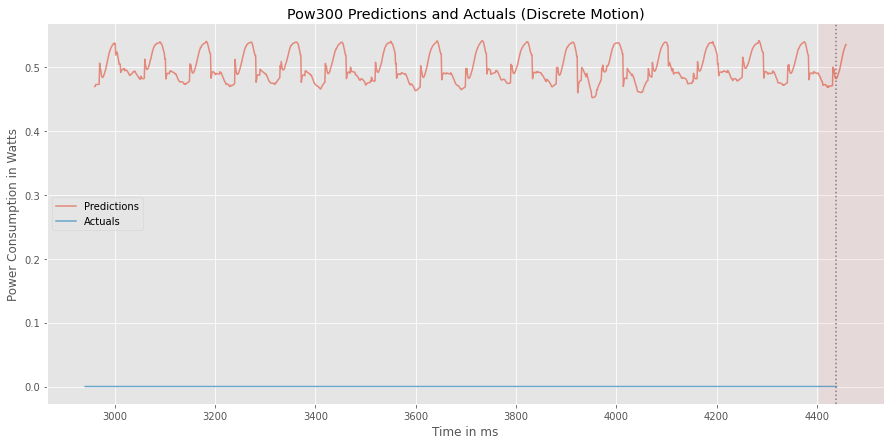

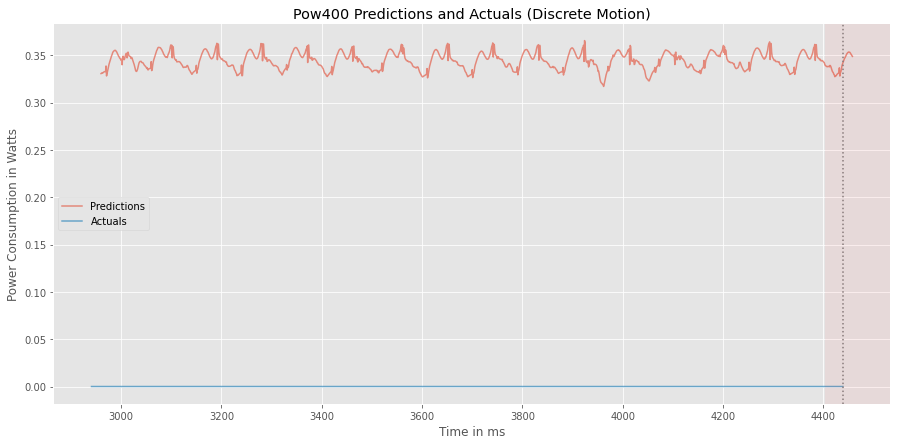

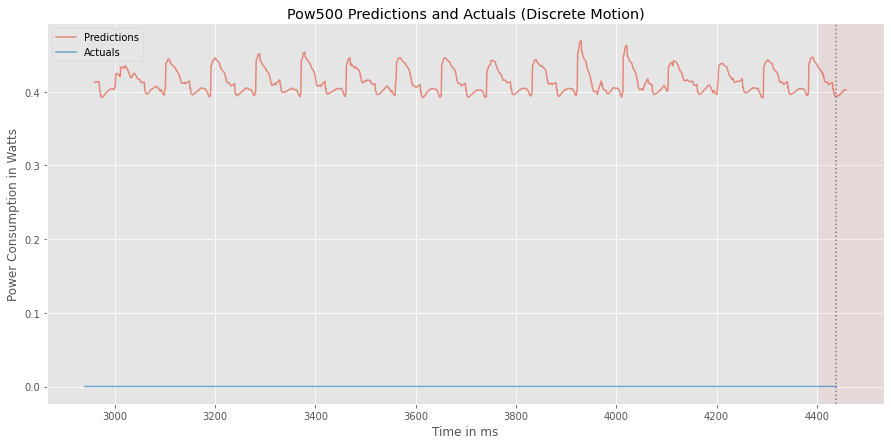

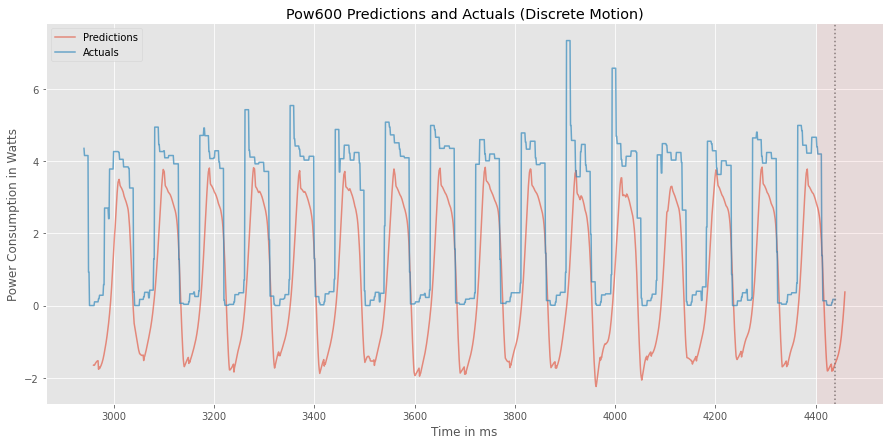

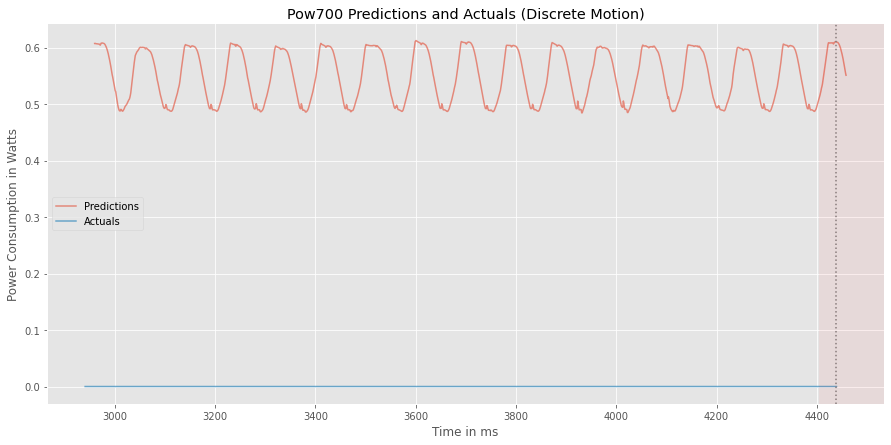

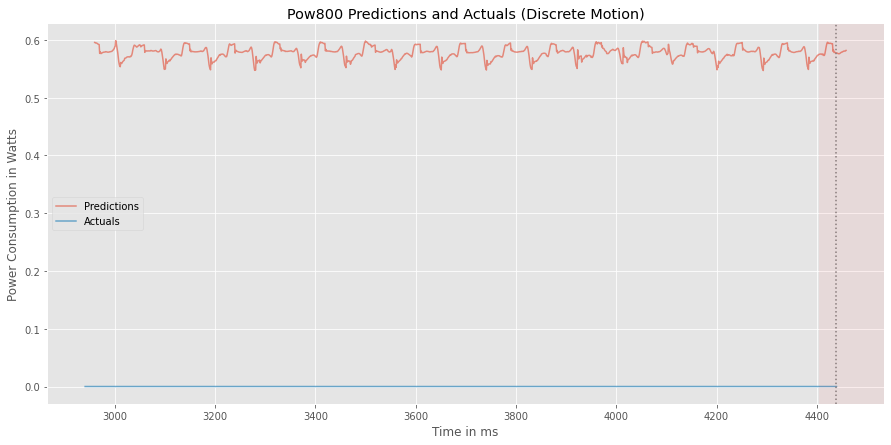

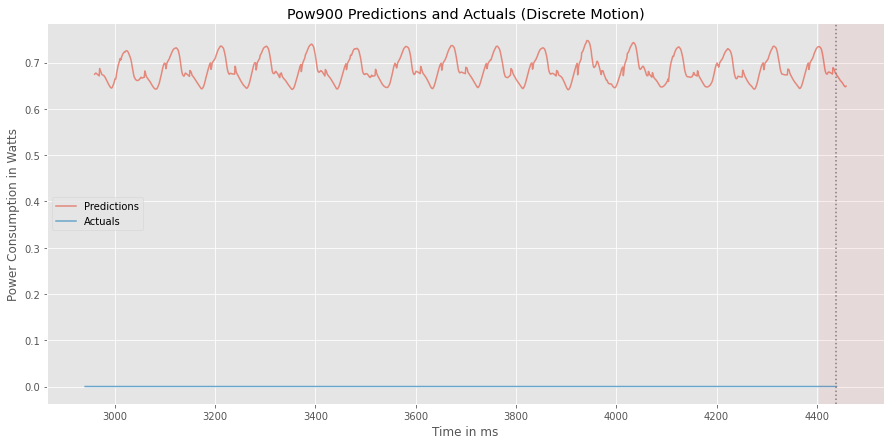

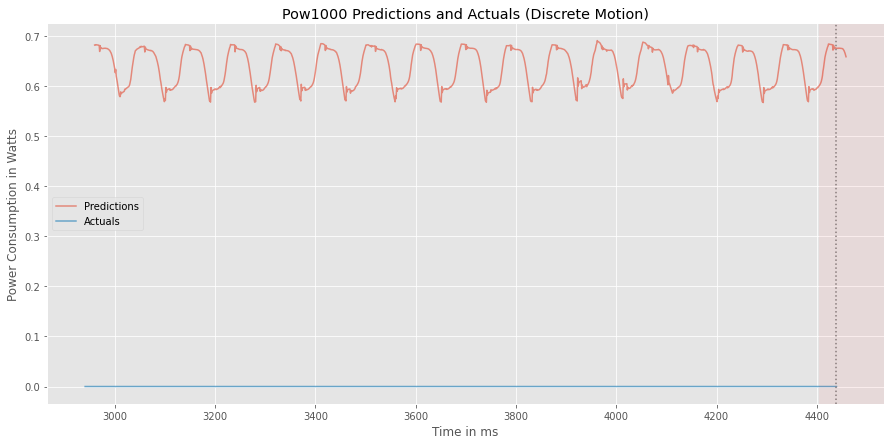

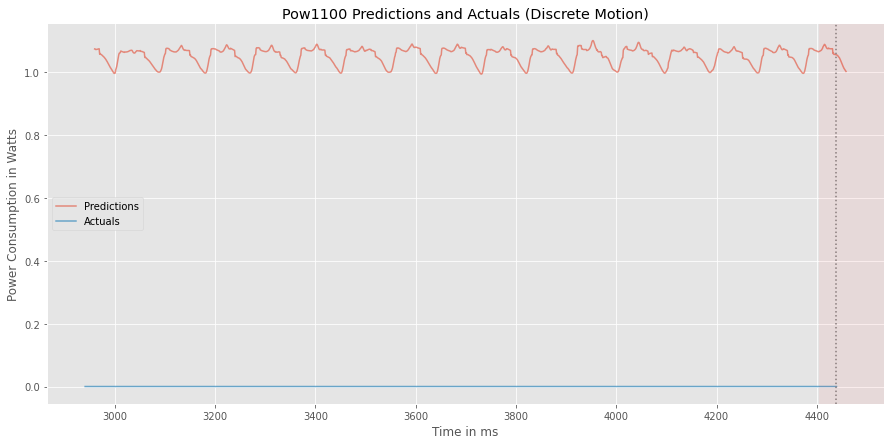

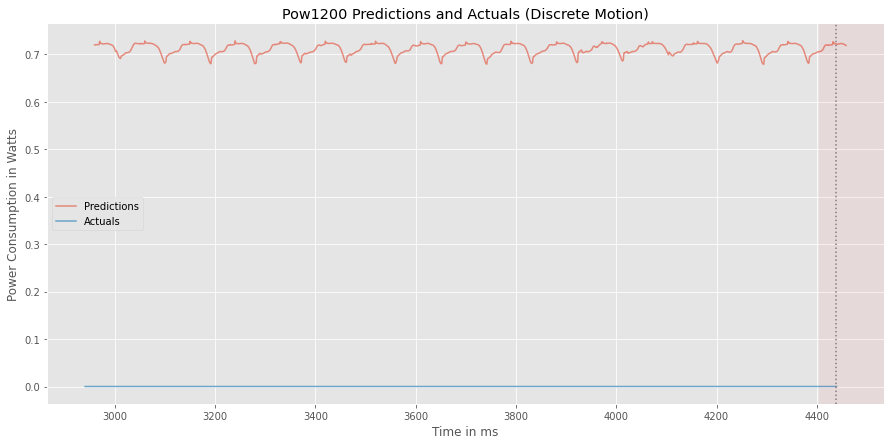

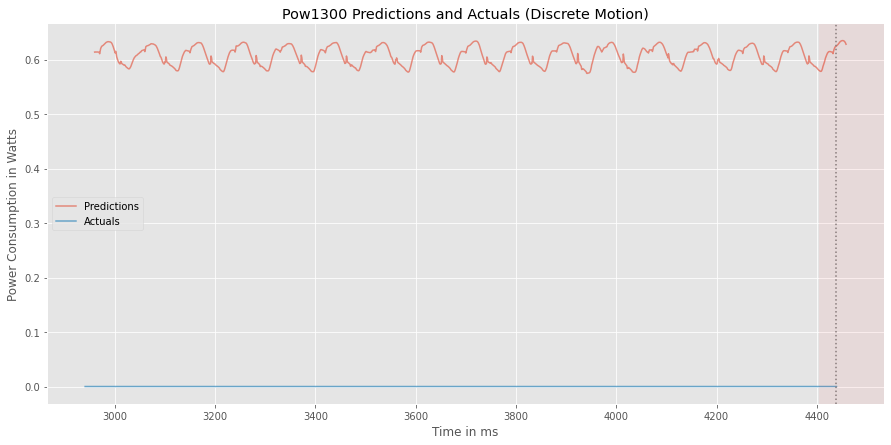

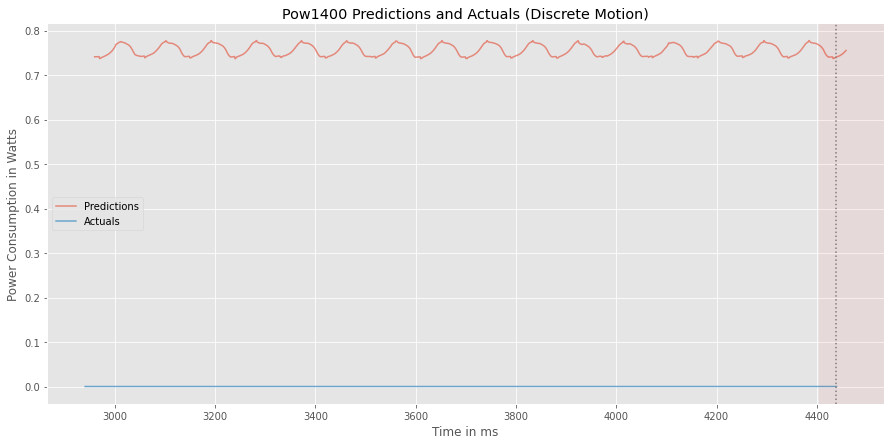

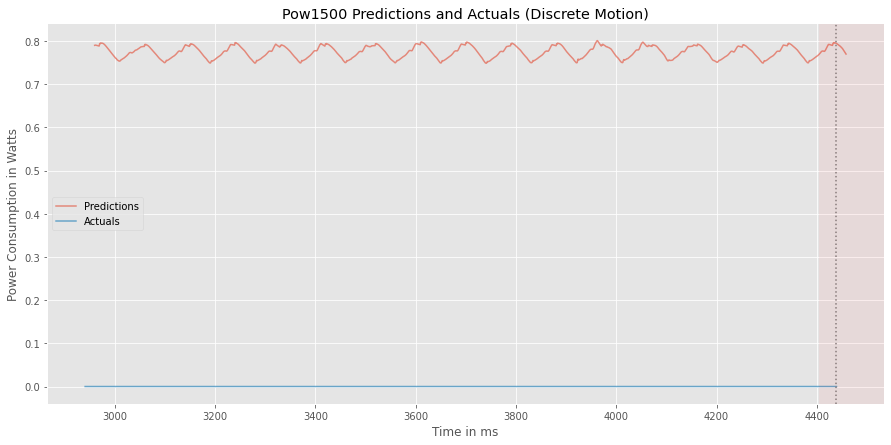

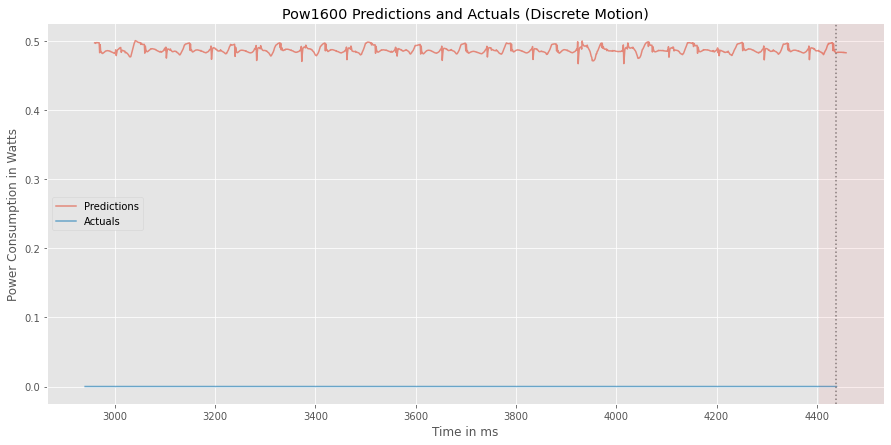

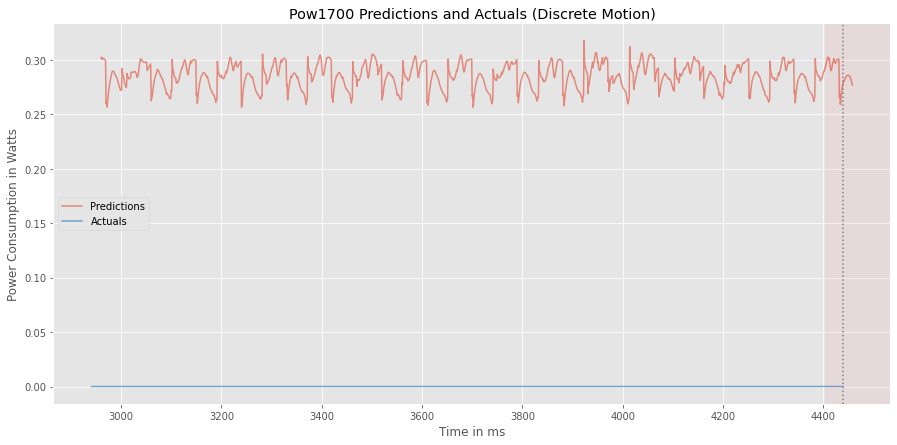

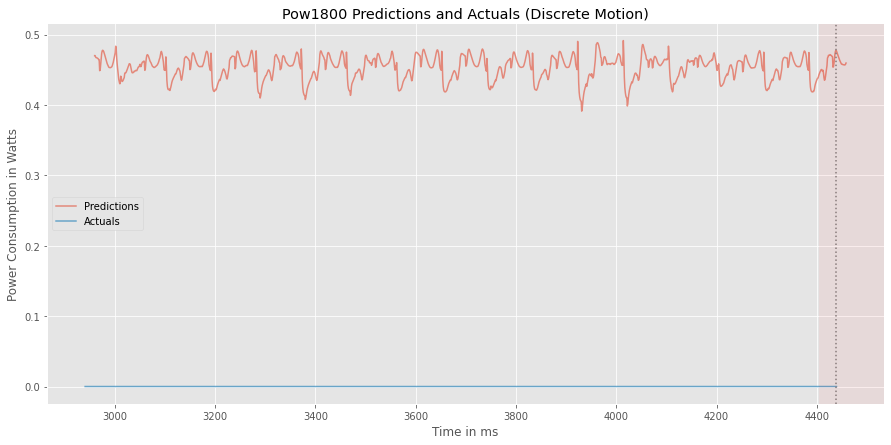

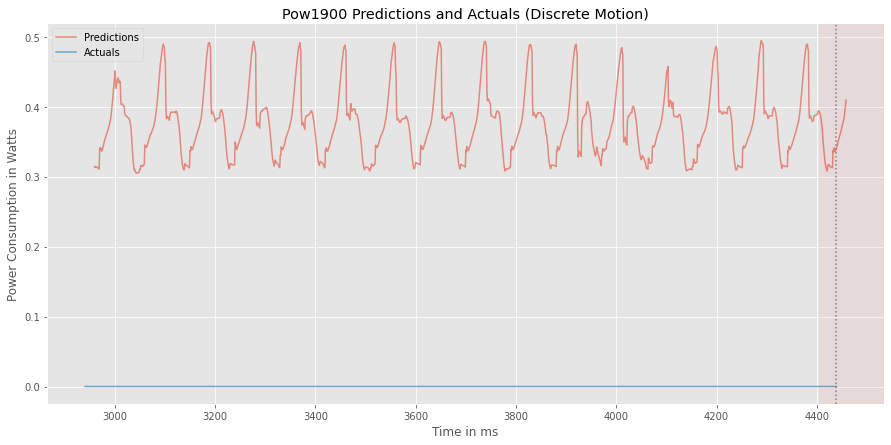

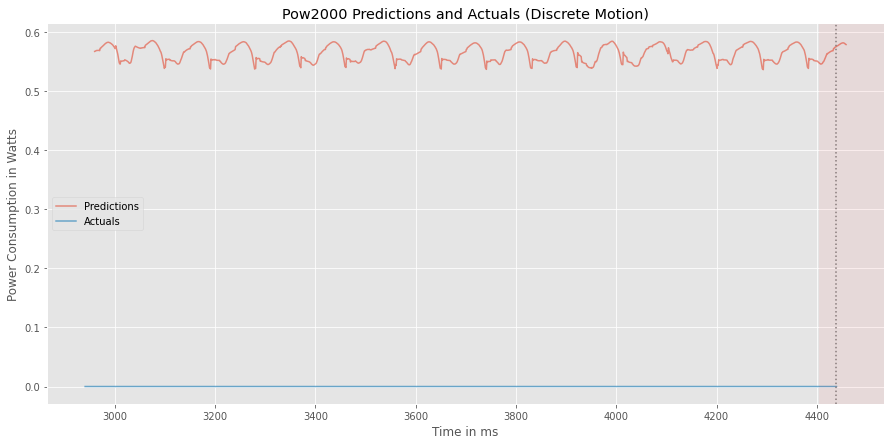

In [47]:
print_act_and_pred_tables(re_yhat2,re_y_test2,20, -1500,-1)

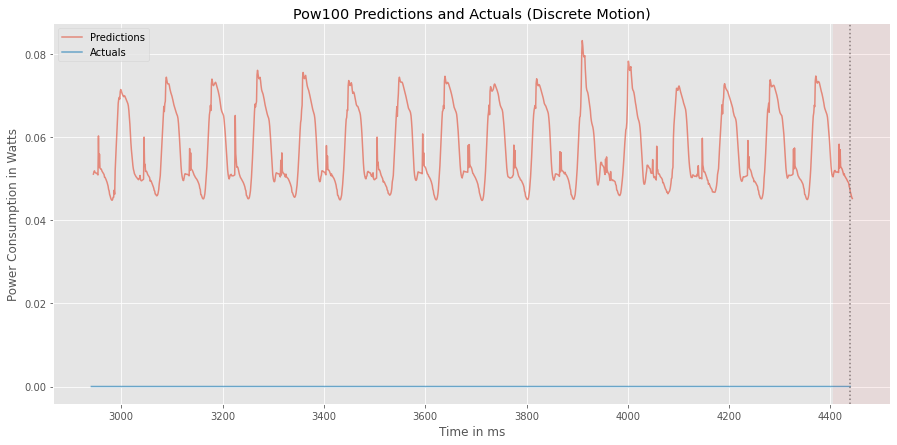

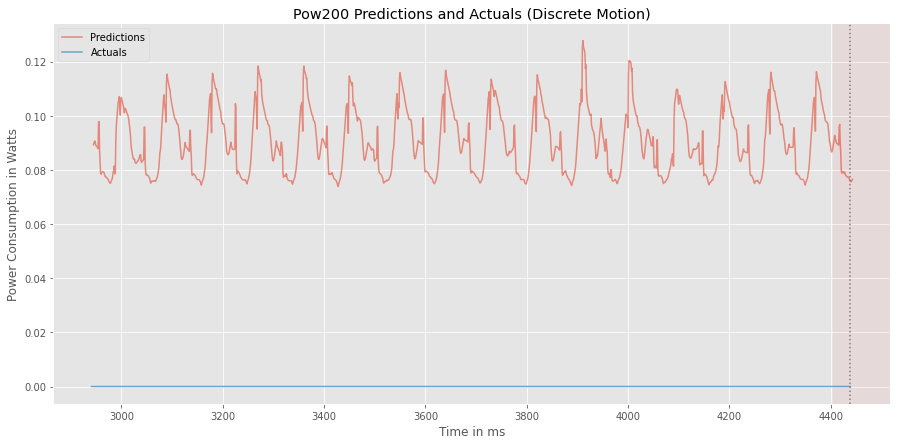

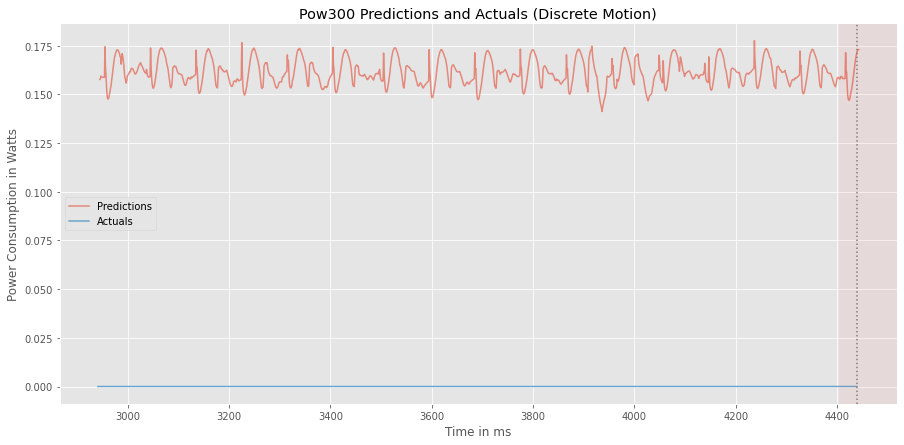

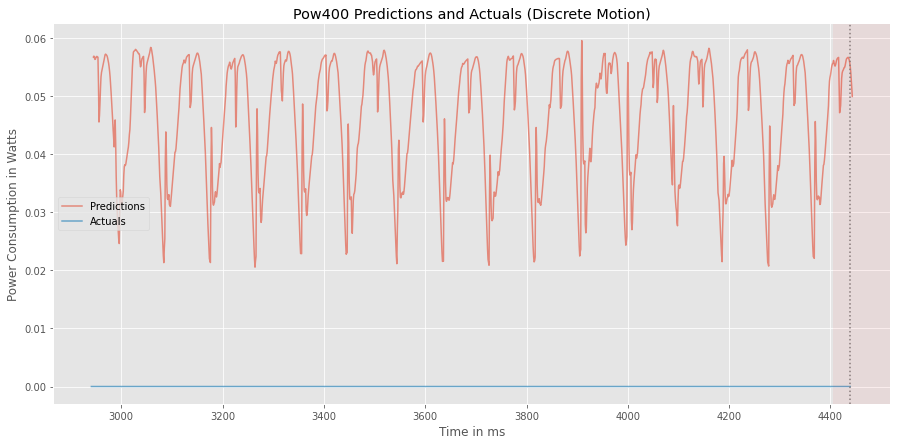

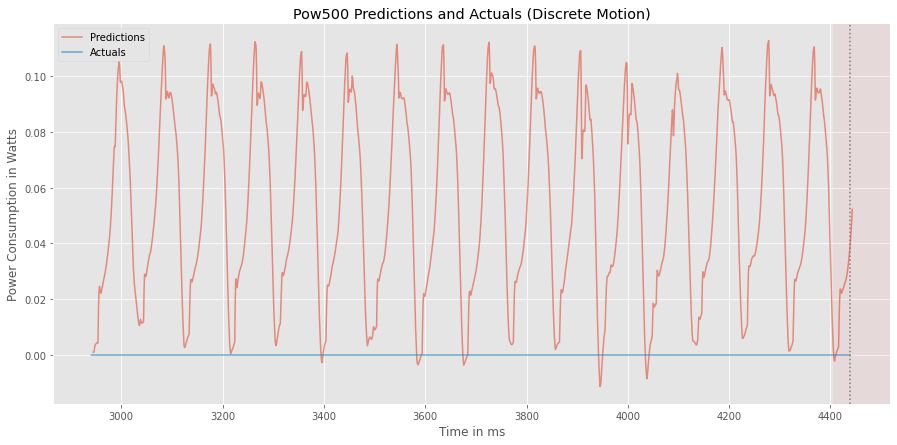

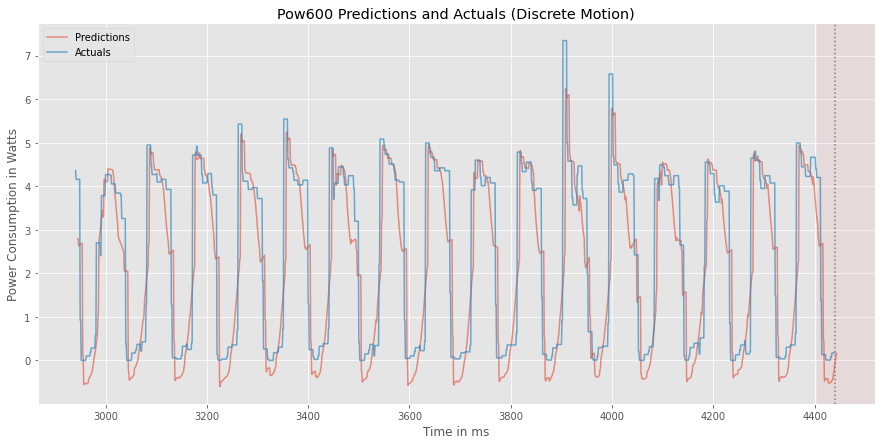

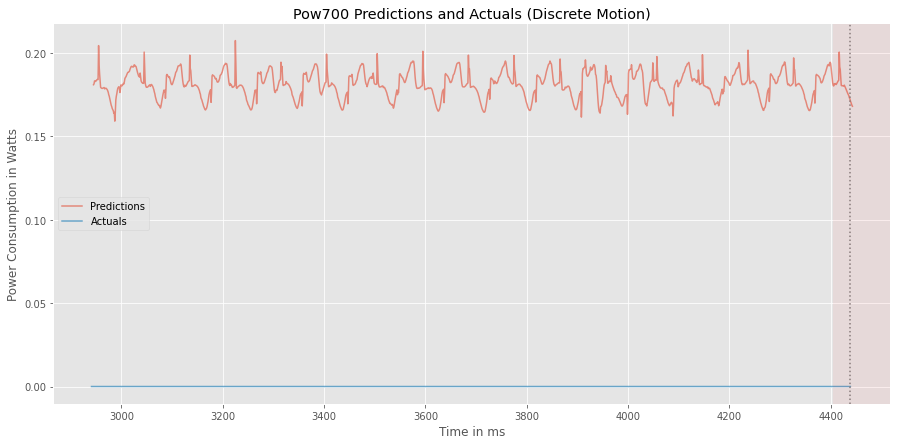

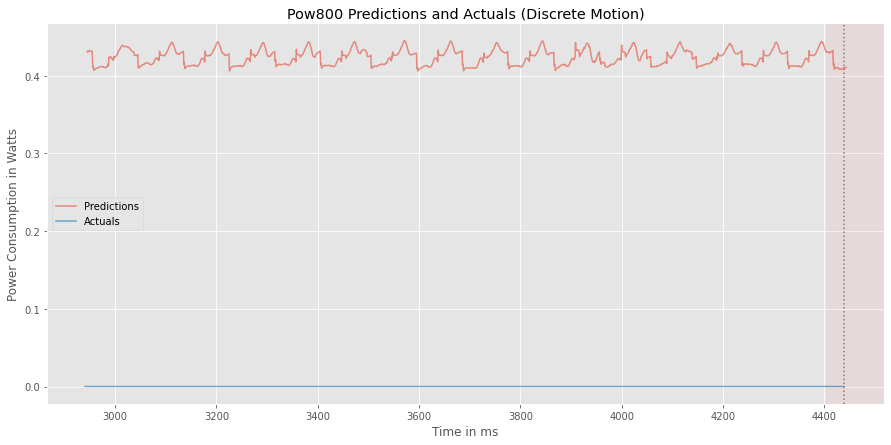

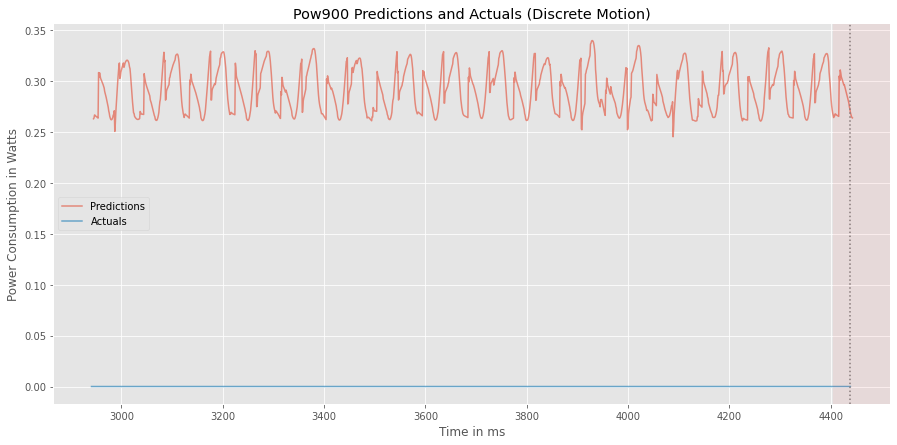

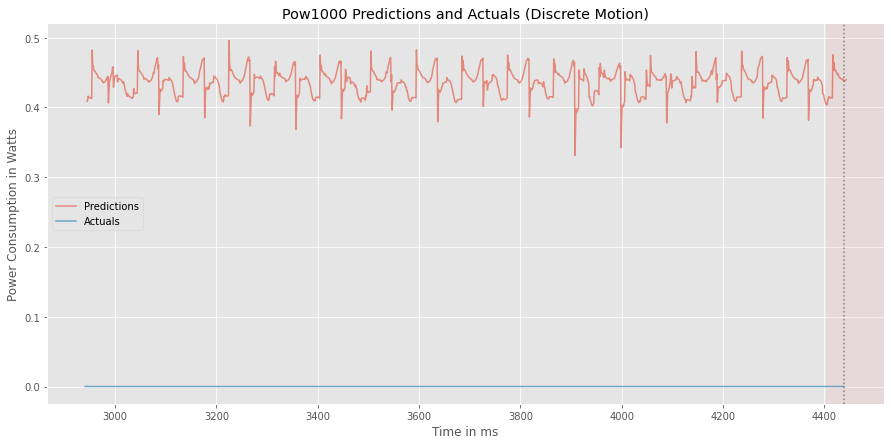

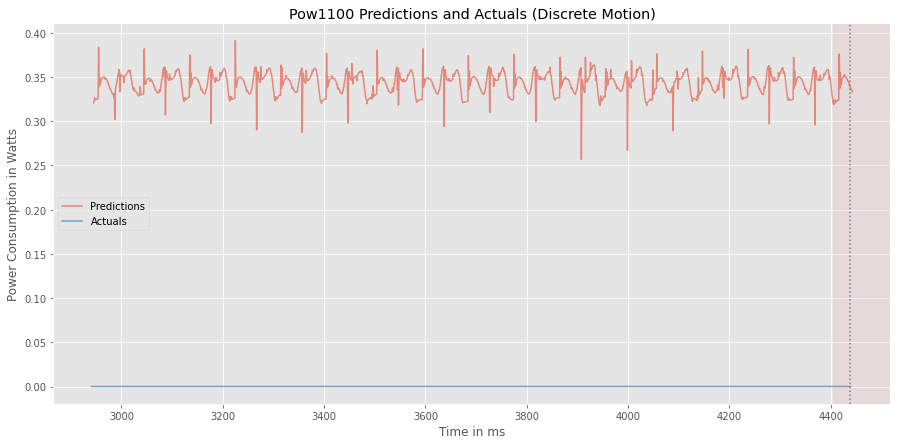

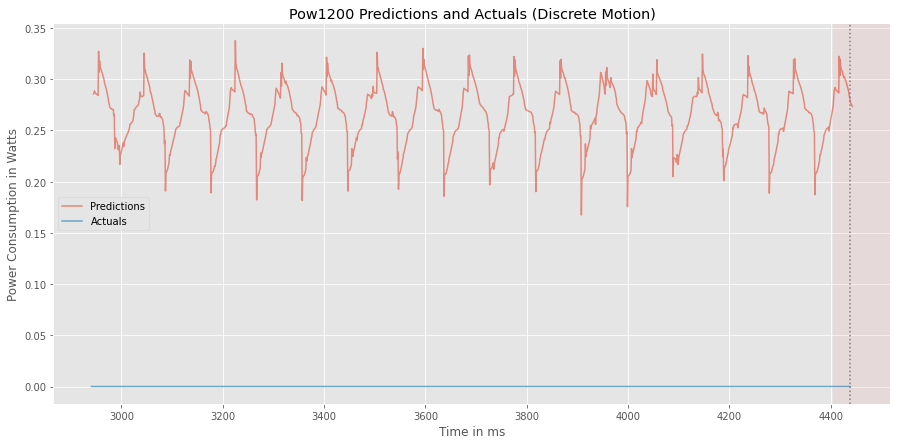

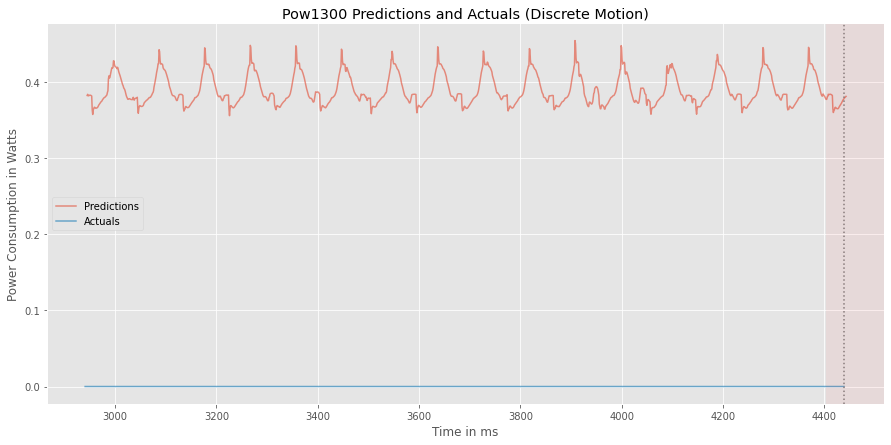

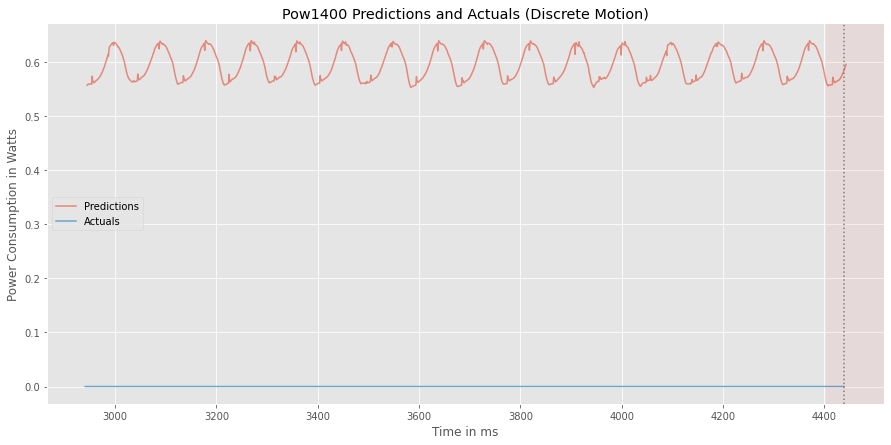

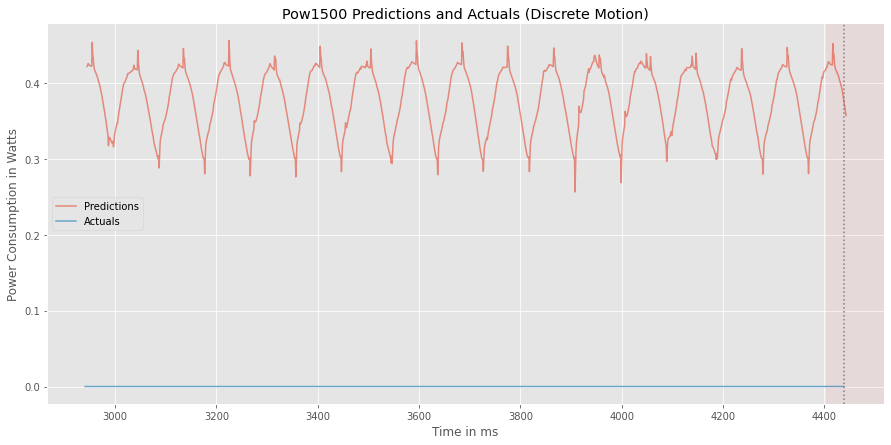

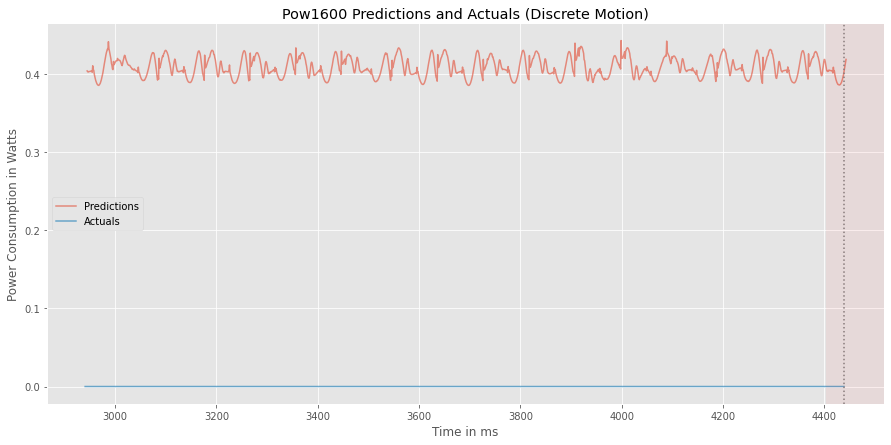

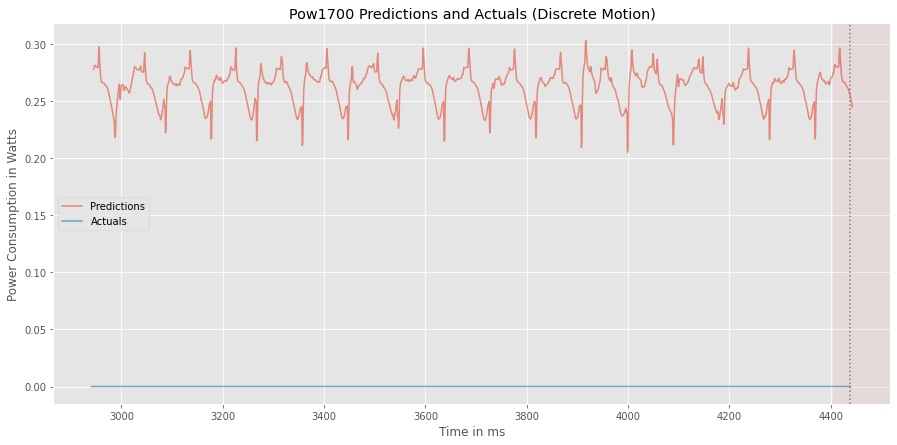

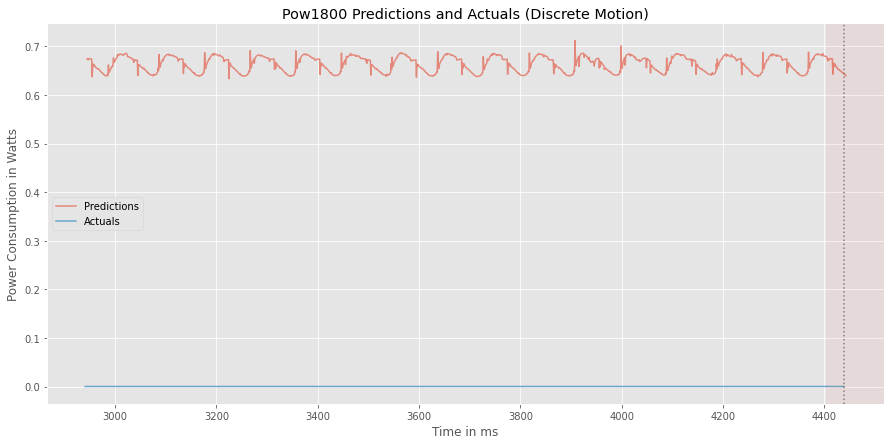

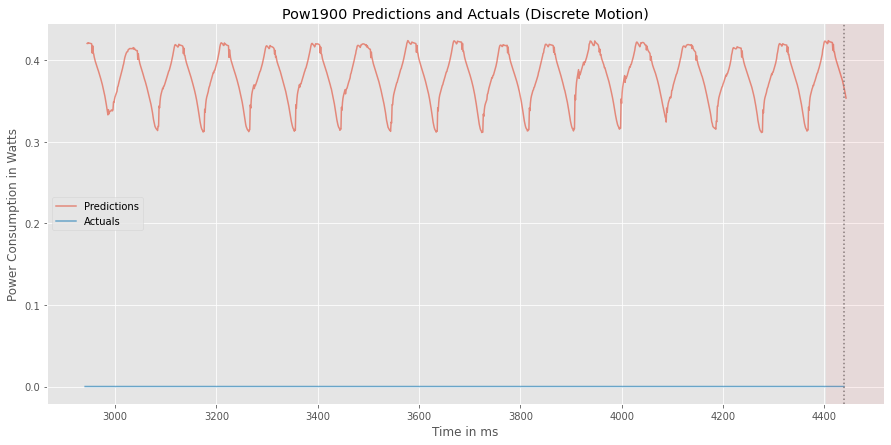

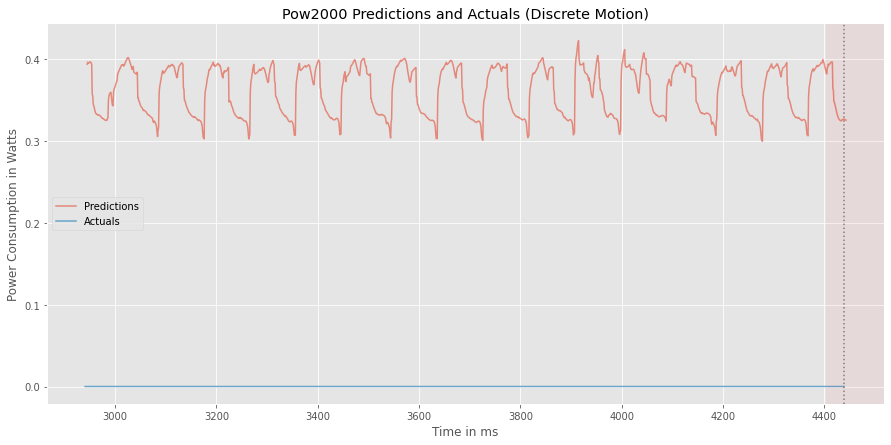

In [48]:
print_act_and_pred_tables(re_yhat2,re_y_test2,5, -1500,-1)